<a href="https://colab.research.google.com/github/Vrushti709/Git-demo/blob/main/Customer_Segmentation_Using_RFM_Analysis_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from google.colab import files

In [2]:
uploaded = files.upload()



Saving ecommerce_transactions.csv to ecommerce_transactions (1).csv


In [3]:
df = pd.read_csv("ecommerce_transactions.csv")
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [4]:
latest_date = df['OrderDate'].max()

In [6]:
rfm = df.groupby('CustomerID').agg({
    'OrderDate': lambda x: (latest_date - x.max()).days,
    'CustomerID': 'count',
    'Amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [7]:
print("RFM Table:\n", rfm.head())

RFM Table:
             Recency  Frequency  Monetary
CustomerID                              
CUST_1          352          7      1536
CUST_10         154          9      2398
CUST_100        192          2       623
CUST_101        141          5      1362
CUST_102        243          8      2117


In [8]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

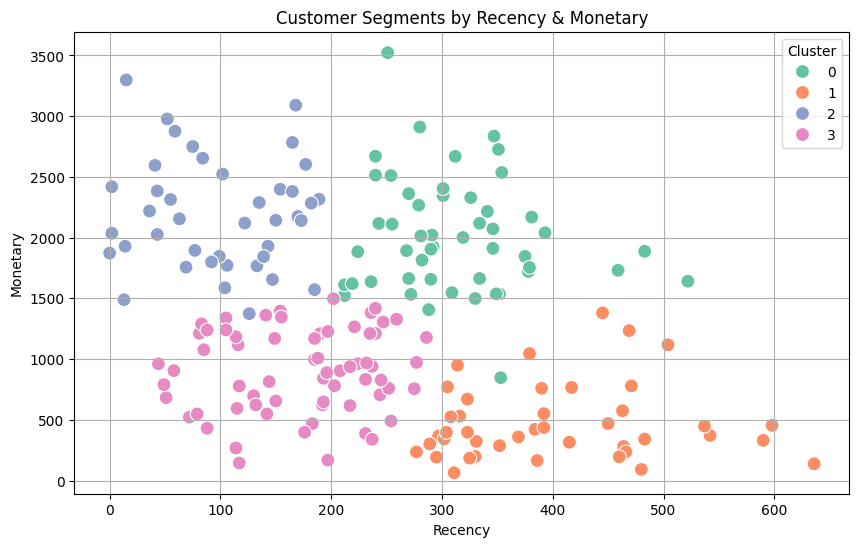

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments by Recency & Monetary")
plt.grid(True)
plt.show()

In [11]:
cluster_summary = rfm.groupby('Cluster').mean().round(2)
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
          Recency  Frequency  Monetary
Cluster                              
0         312.28       7.36   2013.60
1         398.98       1.86    471.25
2          99.24       7.71   2196.05
3         172.35       3.40    901.23
